<a href="https://colab.research.google.com/github/Boshjiggs1/IST-718-Big-Data-Analytics/blob/main/Lab_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Josh Biggs-Bauer

IST 718

3/13/2022


                                          Lab 3





# Import data and required python libraries


In [ ]:
path = '/content/drive/MyDrive/IST 718'

In [ ]:
from tensorflow.keras import datasets             

from sklearn.metrics import confusion_matrix      
import matplotlib.pyplot as plt                   
import numpy as np                                
import seaborn as sns; sns.set()                  
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers               

from tensorflow.keras import Sequential           
from keras.callbacks import ModelCheckpoint       
from sklearn.naive_bayes import GaussianNB       
from sklearn.tree import DecisionTreeClassifier   
import os
import struct
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import sys
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

%matplotlib inline

# MNIST Fashion Dataset

The MNIST datase used in this lab is a set of clothing images/catalog of Zalando(European e-commerce company based in Berlin). The dataset consists of 60,000 records, and 10,000 in the test set. 


## Load The Data
MNIST fashion dataset is already in tensorflow keras library.

Data reference:

x_train contains the training images
y_train contains labels for each image
x_test contains the testing images
y_test contains labels for each image
Label referene:

0 = t-shirt
1 = trouser
2 = pullover
3 = dress
4 = coat
5 = sandal
6 = shirt
7 = sneaker
8 = bag
9 = angle-boot

In [ ]:
# Load data from tenserflow keras
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Label names according to label reference
label_name = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'angle-boot']

4431872/4422102 [==============================] - 0s 0us/step


# Normalize the Data

Make sure the data is at the same scale.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Visualize the data

Visual of first 15 images with their labels.

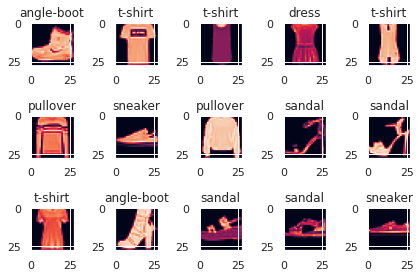

In [ ]:
fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
  axi.imshow(x_train[i])
  axi.set_title(label_name[y_train[i]])
plt.show()

#Gaussian Naive Bayes

In [ ]:
# Reshape input data to naive bayes algorithm
w, h = 28, 28
gnb_x_train = x_train.reshape(x_train.shape[0], w*h)
gnb_x_test = x_test.reshape(x_test.shape[0], w*h)

gnb_model = GaussianNB()
%time gnb_model.fit(gnb_x_train, y_train)

CPU times: user 277 ms, sys: 35.7 ms, total: 313 ms
Wall time: 314 ms


GaussianNB()

In [ ]:
gnb_y_fit = gnb_model.predict(gnb_x_test)

In [ ]:
print(classification_report(y_test, gnb_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     t-shirt       0.81      0.59      0.68      1000
     trouser       0.64      0.94      0.76      1000
    pullover       0.59      0.32      0.42      1000
       dress       0.44      0.55      0.49      1000
        coat       0.38      0.78      0.51      1000
      sandal       0.93      0.28      0.43      1000
       shirt       0.32      0.04      0.07      1000
     sneaker       0.51      0.99      0.67      1000
         bag       0.83      0.71      0.77      1000
  angle-boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



#Accuracy

As we can see, this model is not very accurate when dealing with this dataset. The accuracy is only about 60%. 

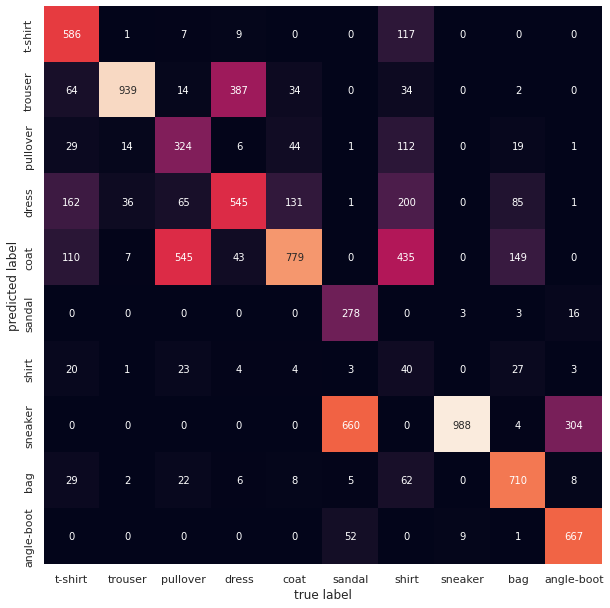

In [ ]:
mat = confusion_matrix(y_test, gnb_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

#Decision Tree

In [ ]:
w, h = 28, 28
dt_x_train = x_train.reshape(x_train.shape[0], w*h)
dt_x_test = x_test.reshape(x_test.shape[0], w*h)

dt_model = DecisionTreeClassifier()
%time dt_model.fit(dt_x_train, y_train)

CPU times: user 41.3 s, sys: 23.7 ms, total: 41.3 s
Wall time: 41.3 s


DecisionTreeClassifier()

In [ ]:
dt_y_fit = dt_model.predict(dt_x_test)

In [ ]:
print(classification_report(y_test, dt_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     t-shirt       0.75      0.74      0.75      1000
     trouser       0.96      0.95      0.95      1000
    pullover       0.63      0.65      0.64      1000
       dress       0.81      0.79      0.80      1000
        coat       0.64      0.62      0.63      1000
      sandal       0.91      0.87      0.89      1000
       shirt       0.52      0.55      0.54      1000
     sneaker       0.86      0.88      0.87      1000
         bag       0.90      0.91      0.91      1000
  angle-boot       0.89      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



#Accuracy

With the Decision tree we got a better result. The accuracy improved from about 60% to almost 80% with this approach. 

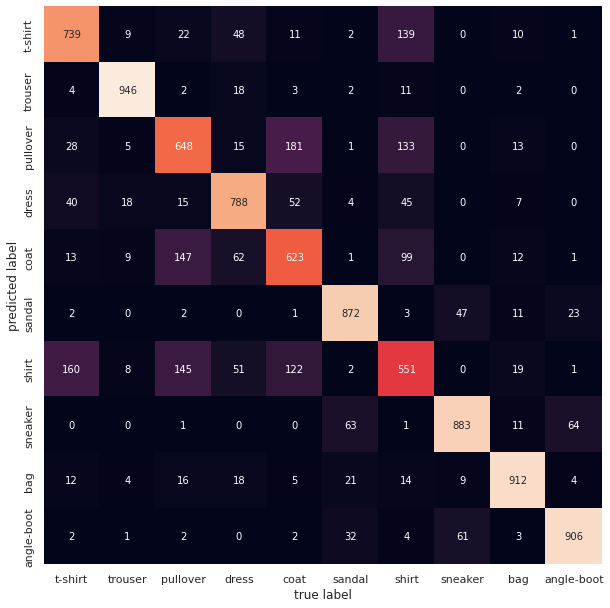

In [ ]:
mat = confusion_matrix(y_test, dt_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

#Neural Network

In [ ]:
w, h = 28, 28
nn_x_train = x_train.reshape(x_train.shape[0], w, h, 1)
nn_x_test = x_test.reshape(x_test.shape[0], w, h, 1)
nn_y_train = to_categorical(y_train, 10)

In [ ]:
nn_model = Sequential()

# Must define the input shape in the first layer of the neural network
nn_model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
nn_model.add(layers.MaxPooling2D(pool_size=2))
nn_model.add(layers.Dropout(0.3))

nn_model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn_model.add(layers.MaxPooling2D(pool_size=2))
nn_model.add(layers.Dropout(0.3))

nn_model.add(layers.Flatten())
nn_model.add(layers.Dense(256, activation='relu'))
nn_model.add(layers.Dropout(0.5))
nn_model.add(layers.Dense(10, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
%time nn_model.fit(nn_x_train, nn_y_train, batch_size=64, epochs=100, callbacks=[checkpointer])

Epoch 1/100
938/938 [==============================] - 5s 5ms/step - loss: 0.5927 - accuracy: 0.7828
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4097 - accuracy: 0.8518
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3662 - accuracy: 0.8673
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3414 - accuracy: 0.8756
Epoch 5/100
938/938 [==============================] - 4s 5ms/step - loss: 0.3191 - accuracy: 0.8834
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3055 - accuracy: 0.8868
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.2919 - accuracy: 0.8921
Epoch 8/100
938/938 [==============================] - 5s 6ms/step - loss: 0.2827 - accuracy: 0.8950
Epoch 9/100
938/938 [==============================] - 6s 7ms/step - loss: 0.2711 - accuracy: 0.8996
Epoch 10/100
938/938 [==============================] - 4s 4ms/step - loss: 0.2643 - accura

In [ ]:
# Convert nn_model prediction results
nn_prediction_results = nn_model.predict(nn_x_test)
nn_y_fit = np.full((10000,), 0, dtype='uint8')

for i in range(0, len(nn_prediction_results)-1, 1):
  nn_y_fit[i] = np.argmax(nn_prediction_results[i])

In [ ]:
print(classification_report(y_test, nn_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     t-shirt       0.89      0.87      0.88      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.86      0.92      0.89      1000
       dress       0.94      0.92      0.93      1000
        coat       0.86      0.90      0.88      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.79      0.76      0.77      1000
     sneaker       0.95      0.99      0.97      1000
         bag       0.99      0.98      0.99      1000
  angle-boot       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#Accuracy

As we can see with this approach, it has yielded us the best results so far, with 93% accuracy.

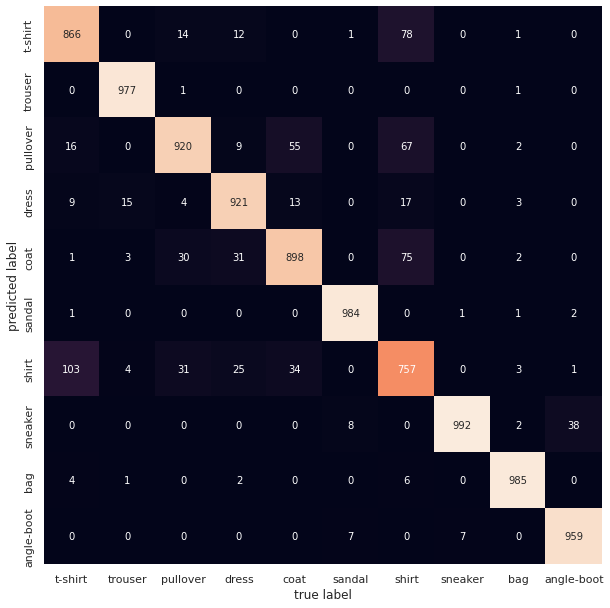

In [ ]:
mat = confusion_matrix(y_test, nn_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print('Rows: %d, columns: %d' % (x_train.shape[0], x_train.shape[1]))

Rows: 60000, columns: 28


In [ ]:
print('Rows: %d, columns: %d' % (x_test.shape[0], x_test.shape[1]))

Rows: 10000, columns: 28


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

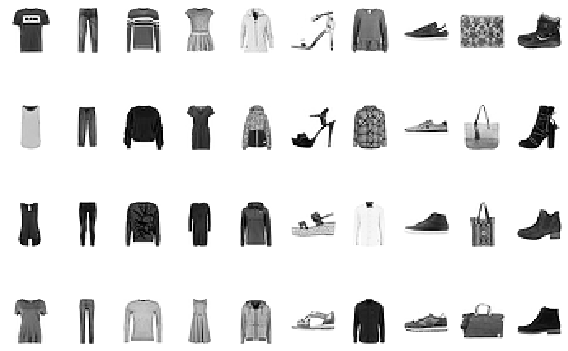

In [ ]:
# VISUALIZE DIFFERENT VARIATIONS OF Each Category
nRows = 4
numCats = len(np.unique(y_train))
fig, ax = plt.subplots(nrows=nRows, ncols=numCats, sharex=True, sharey=True,figsize=(8, 6))
ax = ax.flatten()
for i in range(numCats * nRows):
    img = x_train[y_train == i%numCats][i//numCats].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_9.png', dpi=300)
plt.show()

In [ ]:
countsTrain = np.unique(y_train, return_counts=True)

In [ ]:
pd.DataFrame(zip(countsTrain[0], countsTrain[1]), columns=['label', 'counts'])

,label,counts
0,0,6000
1,1,6000
2,2,6000
3,3,6000
4,4,6000
5,5,6000
6,6,6000
7,7,6000
8,8,6000
9,9,6000


In [ ]:
countsTest = np.unique(y_test, return_counts=True)

In [ ]:
pd.DataFrame(zip(countsTest[0], countsTest[1]), columns=['label', 'counts'])

,label,counts
0,0,1000
1,1,1000
2,2,1000
3,3,1000
4,4,1000
5,5,1000
6,6,1000
7,7,1000
8,8,1000
9,9,1000


#Keras Model

In this Keras model, it takes stat-of-the-art neural networks, and uses them for computer vision. 

##Build Model

In [ ]:
IMG_SIZE = 28

model = Sequential()

# First Layer
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Second Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Third Layer
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

##Model Structure

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                      

##Compile and Fit

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

In [ ]:
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [ ]:
history = model.fit(x_train.reshape(len(y_train),28,28,1), y_binary_train, 
                    batch_size=50, 
                    epochs=100, 
                    verbose=1,
                   validation_data=(x_test.reshape(len(y_test),28,28,1), y_binary_test))

Epoch 1/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2727 - accuracy: 0.8976 - val_loss: 0.3486 - val_accuracy: 0.8709
Epoch 2/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2517 - accuracy: 0.9066 - val_loss: 0.3755 - val_accuracy: 0.8609
Epoch 3/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2320 - accuracy: 0.9136 - val_loss: 0.2939 - val_accuracy: 0.8916
Epoch 4/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2156 - accuracy: 0.9195 - val_loss: 0.3147 - val_accuracy: 0.8838
Epoch 5/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2026 - accuracy: 0.9227 - val_loss: 0.3022 - val_accuracy: 0.8910
Epoch 6/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1875 - accuracy: 0.9297 - val_loss: 0.2954 - val_accuracy: 0.8999
Epoch 7/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1808 - accuracy: 0.9312 - val_loss: 0.2903 - val_ac

##Save Model

In [ ]:
model.save(path + 'keras_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/IST 718keras_model/assets


In [ ]:
# model = keras.models.load_model(path + 'keras_model')

##Look at model history

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


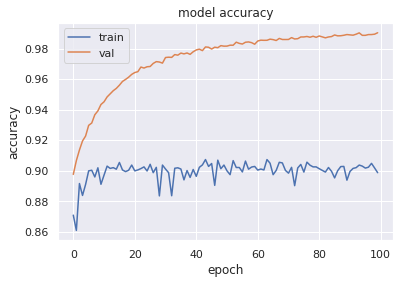

In [ ]:
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

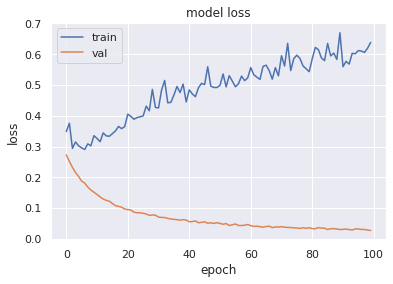

In [ ]:
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = np.argmax(model.predict(x_train.reshape(len(y_train),28,28,1)), axis=-1)

if sys.version_info < (3, 0):
    acc = (np.sum(y_train == y_train_pred, axis=0)).astype('float') / x_test.shape[0]
else:
    acc = np.sum(y_train == y_train_pred, axis=0) / x_train.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 99.46%


#Accuracy

This model was by far the most accurate, it yielded a result of 99.46%.

#Conclusion

In the end we can see the with this type of dataset, that the keras model works really well. The first model has the upperhand for speed, but if you are looking for accuracy, Keras would be the best choice. 